<a href="https://colab.research.google.com/github/gvm99/machine-learning-template-models/blob/master/taxi_trip_using_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]
import seaborn as sns
from google.colab import auth
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

    100% |████████████████████████████████| 993kB 6.6MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


Autenticação



In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train - 1iIGR33h4EcLmzAdg5-1dC9UeHIPigWz9
test  - 1tF3W6bF2QOH2qo0TIA_DbA2NkP3ve5WI
submission - 1oARg_I12Hj9JO2Bmnb6VHgGuspPDqi2R

In [0]:
train_downloaded = drive.CreateFile({'id':'1iIGR33h4EcLmzAdg5-1dC9UeHIPigWz9'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1tF3W6bF2QOH2qo0TIA_DbA2NkP3ve5WI'})
test_downloaded.GetContentFile('test.csv')

df_train = pd.read_csv('train.csv')

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<function matplotlib.pyplot.show>

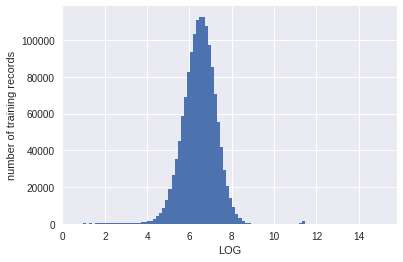

In [16]:
#data preprocessing
##How Long is average tip
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['log_trip_duration'].values,bins = 100)
plt.xlabel('LOG')
plt.ylabel('number of training records')
plt.show


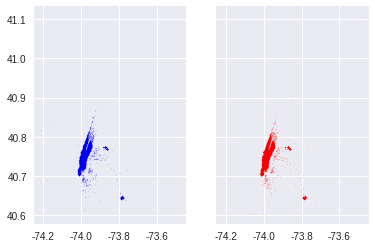

In [20]:
N = 10000

city_long_border = (-74,-75)
city_long_border = (40,40)
fig, ax = plt.subplots(ncols = 2,sharex=True,sharey = True)
ax[0].scatter(df_train['pickup_longitude'].values[:N],
              df_train['pickup_latitude'].values[:N],
             color = 'blue',s=1, label = 'train', alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N],
              df_test['pickup_latitude'].values[:N],
             color = 'red',s=1, label = 'test', alpha=0.1)

plt.show()

In [23]:
feature_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)
Xtr,Xtv,ytr,ytv = train_test_split(df_train[feature_names].values, y, test_size = 0.2, random_state = 1987)

model = xgb.train('default',df_train)

TypeError: ignored